In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, normalized_mutual_info_score
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import torch
import torch.nn as nn
from tensorflow.keras.preprocessing.image import array_to_img
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, TensorDataset
from tqdm import tqdm  
from skimage.metrics import structural_similarity as ssim




In [4]:
# Alzheimer's
alz_mri_train = np.load('alz_mri_train.npy')
alz_mri_test = np.load('alz_mri_test.npy')
alz_mri_val = np.load('alz_mri_val.npy')
alz_pet_train = np.load('alz_pet_train.npy')
alz_pet_test = np.load('alz_pet_test.npy')
alz_pet_val = np.load('alz_pet_val.npy')
print("Alzheimer MRI Train size:", alz_mri_train.shape)
print("Alzheimer MRI Test size:", alz_mri_test.shape)
print("Alzheimer MRI Validation size:", alz_mri_val.shape)
print("Alzheimer PET Train size:", alz_pet_train.shape)
print("Alzheimer PET Test size:", alz_pet_test.shape)
print("Alzheimer PET Validation size:", alz_pet_val.shape)

# Bronchogenic 
brchgen_mri_train = np.load('brchgen_mri_train.npy')
brchgen_mri_test = np.load('brchgen_mri_test.npy')
brchgen_mri_val = np.load('brchgen_mri_val.npy')
brchgen_pet_train = np.load('brchgen_pet_train.npy')
brchgen_pet_test = np.load('brchgen_pet_test.npy')
brchgen_pet_val = np.load('brchgen_pet_val.npy')
print("Bronchogenic MRI Train size:", brchgen_mri_train.shape)
print("Bronchogenic MRI Test size:", brchgen_mri_test.shape)
print("Bronchogenic MRI Validation size:", brchgen_mri_val.shape)
print("Bronchogenic PET Train size:", brchgen_pet_train.shape)
print("Bronchogenic PET Test size:", brchgen_pet_test.shape)
print("Bronchogenic PET Validation size:", brchgen_pet_val.shape)

# Hypertensive Encephalopathy 
hyp_mri_train = np.load('hyp_mri_train.npy')
hyp_mri_test = np.load('hyp_mri_test.npy')
hyp_mri_val = np.load('hyp_mri_val.npy')
hyp_pet_train = np.load('hyp_pet_train.npy')
hyp_pet_test = np.load('hyp_pet_test.npy')
hyp_pet_val = np.load('hyp_pet_val.npy')
print("Hypertensive MRI Train size:", hyp_mri_train.shape)
print("Hypertensive MRI Test size:", hyp_mri_test.shape)
print("Hypertensive MRI Validation size:", hyp_mri_val.shape)
print("Hypertensive PET Train size:", hyp_pet_train.shape)
print("Hypertensive PET Test size:", hyp_pet_test.shape)
print("Hypertensive PET Validation size:", hyp_pet_val.shape)

# Motor Neuron Disease 
motor_mri_train = np.load('motor_mri_train.npy')
motor_mri_test = np.load('motor_mri_test.npy')
motor_mri_val = np.load('motor_mri_val.npy')
motor_pet_train = np.load('motor_pet_train.npy')
motor_pet_test = np.load('motor_pet_test.npy')
motor_pet_val = np.load('motor_pet_val.npy')
print("Motor Neuron MRI Train size:", motor_mri_train.shape)
print("Motor Neuron MRI Test size:", motor_mri_test.shape)
print("Motor Neuron MRI Validation size:", motor_mri_val.shape)
print("Motor Neuron PET Train size:", motor_pet_train.shape)
print("Motor Neuron PET Test size:", motor_pet_test.shape)
print("Motor Neuron PET Validation size:", motor_pet_val.shape)

# Normal Aging 
nrm_mri_train = np.load('nrm_mri_train.npy')
nrm_mri_test = np.load('nrm_mri_test.npy')
nrm_mri_val = np.load('nrm_mri_val.npy')
nrm_pet_train = np.load('nrm_pet_train.npy')
nrm_pet_test = np.load('nrm_pet_test.npy')
nrm_pet_val = np.load('nrm_pet_val.npy')
print("Normal Aging MRI Train size:", nrm_mri_train.shape)
print("Normal Aging MRI Test size:", nrm_mri_test.shape)
print("Normal Aging MRI Validation size:", nrm_mri_val.shape)
print("Normal Aging PET Train size:", nrm_pet_train.shape)
print("Normal Aging PET Test size:", nrm_pet_test.shape)
print("Normal Aging PET Validation size:", nrm_pet_val.shape)


Alzheimer MRI Train size: (256, 256, 3, 11)
Alzheimer MRI Test size: (256, 256, 3, 4)
Alzheimer MRI Validation size: (256, 256, 3, 4)
Alzheimer PET Train size: (256, 256, 3, 11)
Alzheimer PET Test size: (256, 256, 3, 4)
Alzheimer PET Validation size: (256, 256, 3, 4)
Bronchogenic MRI Train size: (256, 256, 3, 12)
Bronchogenic MRI Test size: (256, 256, 3, 5)
Bronchogenic MRI Validation size: (256, 256, 3, 4)
Bronchogenic PET Train size: (256, 256, 3, 12)
Bronchogenic PET Test size: (256, 256, 3, 5)
Bronchogenic PET Validation size: (256, 256, 3, 4)
Hypertensive MRI Train size: (256, 256, 3, 11)
Hypertensive MRI Test size: (256, 256, 3, 4)
Hypertensive MRI Validation size: (256, 256, 3, 4)
Hypertensive PET Train size: (256, 256, 3, 11)
Hypertensive PET Test size: (256, 256, 3, 4)
Hypertensive PET Validation size: (256, 256, 3, 4)
Motor Neuron MRI Train size: (256, 256, 3, 12)
Motor Neuron MRI Test size: (256, 256, 3, 4)
Motor Neuron MRI Validation size: (256, 256, 3, 4)
Motor Neuron PET 

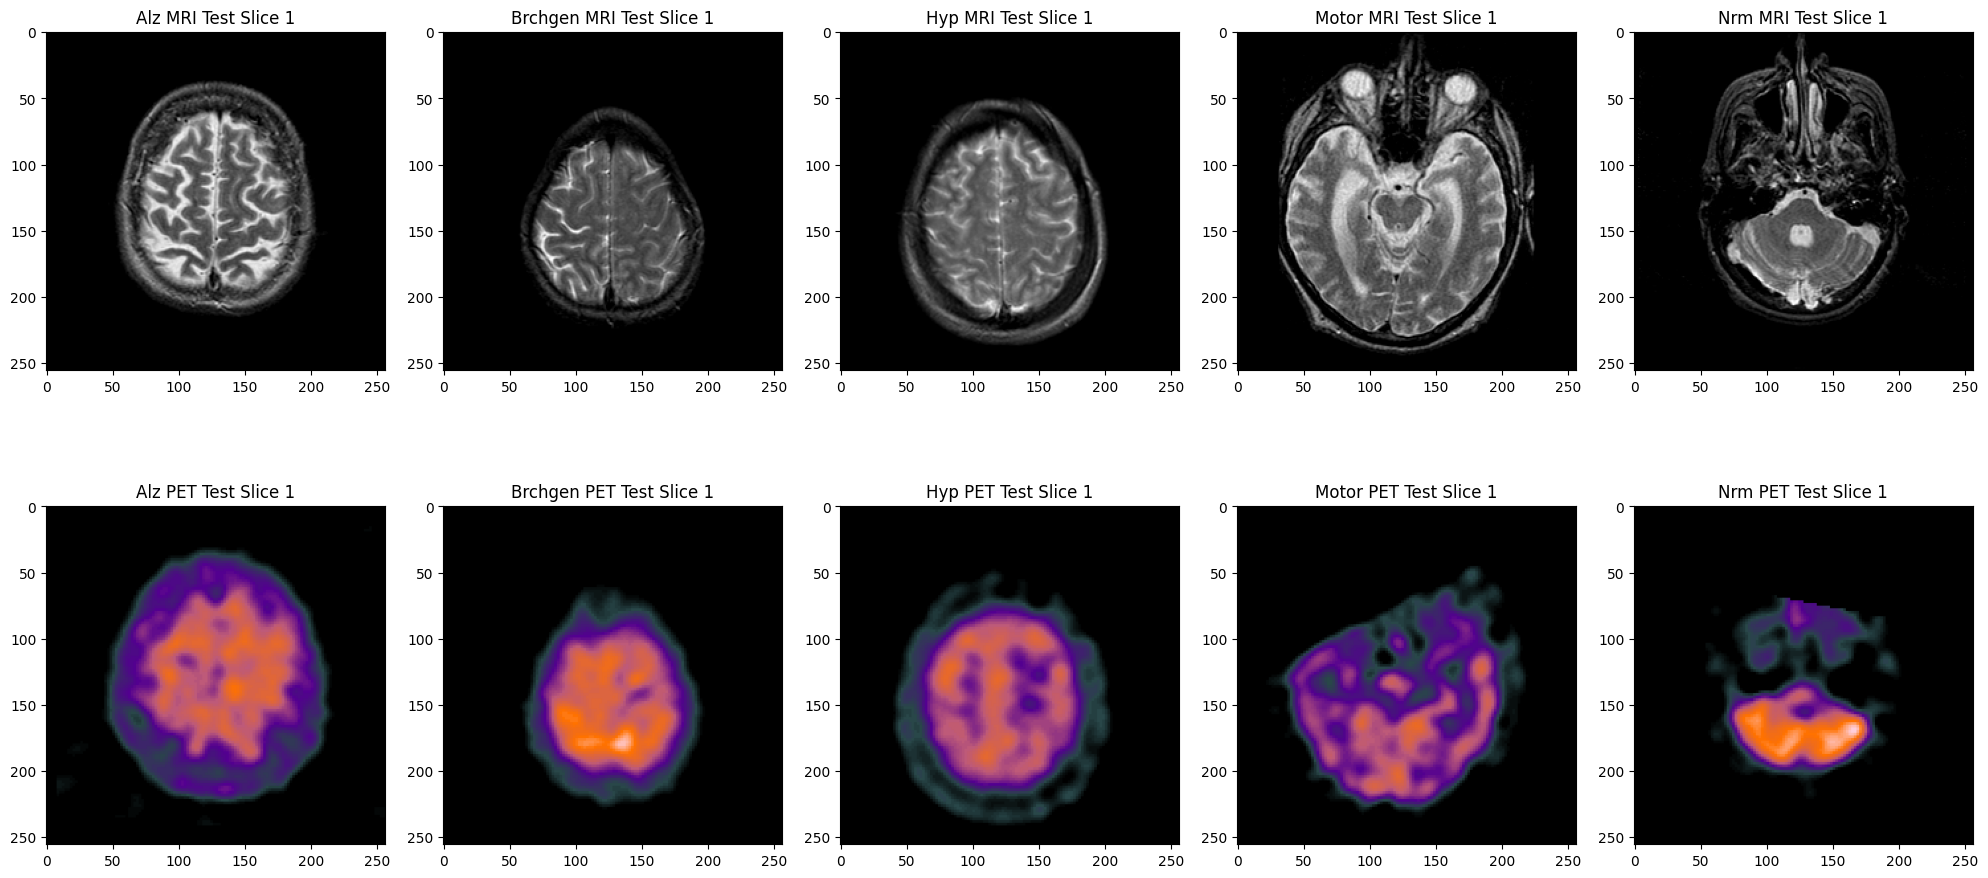

In [5]:
slice_number = 1

alz_mri_test1 = alz_mri_test[:, :, :, slice_number]
alz_pet_test1 = alz_pet_test[:, :, :, slice_number]
brchgen_mri_test1 = brchgen_mri_test[:, :, :, slice_number]
brchgen_pet_test1 = brchgen_pet_test[:, :, :, slice_number]
hyp_mri_test1 = hyp_mri_test[:, :, :, slice_number]
hyp_pet_test1 = hyp_pet_test[:, :, :, slice_number]
motor_mri_test1 = motor_mri_test[:, :, :, slice_number]
motor_pet_test1 = motor_pet_test[:, :, :, slice_number]
nrm_mri_test1 = nrm_mri_test[:, :, :, slice_number]
nrm_pet_test1 = nrm_pet_test[:, :, :, slice_number]

plt.figure(figsize=(20, 10))

plt.subplot(2, 5, 1)
plt.imshow(alz_mri_test1, cmap='gray')
plt.title(f'Alz MRI Test Slice {slice_number}')

plt.subplot(2, 5, 2)
plt.imshow(brchgen_mri_test1, cmap='gray')
plt.title(f'Brchgen MRI Test Slice {slice_number}')

plt.subplot(2, 5, 3)
plt.imshow(hyp_mri_test1, cmap='gray')
plt.title(f'Hyp MRI Test Slice {slice_number}')

plt.subplot(2, 5, 4)
plt.imshow(motor_mri_test1, cmap='gray')
plt.title(f'Motor MRI Test Slice {slice_number}')

plt.subplot(2, 5, 5)
plt.imshow(nrm_mri_test1, cmap='gray')
plt.title(f'Nrm MRI Test Slice {slice_number}')

plt.subplot(2, 5, 6)  
plt.imshow(alz_pet_test1, cmap='gray')
plt.title(f'Alz PET Test Slice {slice_number}')

plt.subplot(2, 5, 7)
plt.imshow(brchgen_pet_test1, cmap='gray')
plt.title(f'Brchgen PET Test Slice {slice_number}')

plt.subplot(2, 5, 8)
plt.imshow(hyp_pet_test1, cmap='gray')
plt.title(f'Hyp PET Test Slice {slice_number}')

plt.subplot(2, 5, 9)
plt.imshow(motor_pet_test1, cmap='gray')
plt.title(f'Motor PET Test Slice {slice_number}')

plt.subplot(2, 5, 10)
plt.imshow(nrm_pet_test1, cmap='gray')
plt.title(f'Nrm PET Test Slice {slice_number}')

plt.tight_layout()  
plt.show()

In [6]:
# to tensor
# Alzheimer's Disease
alz_mri_train_tensor = torch.tensor(alz_mri_train, dtype=torch.float32).permute(3, 0, 1, 2)
alz_mri_test_tensor = torch.tensor(alz_mri_test, dtype=torch.float32).permute(3, 0, 1, 2)
alz_mri_val_tensor = torch.tensor(alz_mri_val, dtype=torch.float32).permute(3, 0, 1, 2)
alz_pet_train_tensor = torch.tensor(alz_pet_train, dtype=torch.float32).permute(3, 0, 1, 2)
alz_pet_test_tensor = torch.tensor(alz_pet_test, dtype=torch.float32).permute(3, 0, 1, 2)
alz_pet_val_tensor = torch.tensor(alz_pet_val, dtype=torch.float32).permute(3, 0, 1, 2)


# Brain Congenital
brchgen_mri_train_tensor = torch.tensor(brchgen_mri_train, dtype=torch.float32).permute(3, 0, 1, 2)
brchgen_mri_test_tensor = torch.tensor(brchgen_mri_test, dtype=torch.float32).permute(3, 0, 1, 2)
brchgen_mri_val_tensor = torch.tensor(brchgen_mri_val, dtype=torch.float32).permute(3, 0, 1, 2)
brchgen_pet_train_tensor = torch.tensor(brchgen_pet_train, dtype=torch.float32).permute(3, 0, 1, 2)
brchgen_pet_test_tensor = torch.tensor(brchgen_pet_test, dtype=torch.float32).permute(3, 0, 1, 2)
brchgen_pet_val_tensor = torch.tensor(brchgen_pet_val, dtype=torch.float32).permute(3, 0, 1, 2)

# Hypertensive
hyp_mri_train_tensor = torch.tensor(hyp_mri_train, dtype=torch.float32).permute(3, 0, 1, 2)
hyp_mri_test_tensor = torch.tensor(hyp_mri_test, dtype=torch.float32).permute(3, 0, 1, 2)
hyp_mri_val_tensor = torch.tensor(hyp_mri_val, dtype=torch.float32).permute(3, 0, 1, 2)
hyp_pet_train_tensor = torch.tensor(hyp_pet_train, dtype=torch.float32).permute(3, 0, 1, 2)
hyp_pet_test_tensor = torch.tensor(hyp_pet_test, dtype=torch.float32).permute(3, 0, 1, 2)
hyp_pet_val_tensor = torch.tensor(hyp_pet_val, dtype=torch.float32).permute(3, 0, 1, 2)

# Motor Neuron
motor_mri_train_tensor = torch.tensor(motor_mri_train, dtype=torch.float32).permute(3, 0, 1, 2)
motor_mri_test_tensor = torch.tensor(motor_mri_test, dtype=torch.float32).permute(3, 0, 1, 2)
motor_mri_val_tensor = torch.tensor(motor_mri_val, dtype=torch.float32).permute(3, 0, 1, 2)
motor_pet_train_tensor = torch.tensor(motor_pet_train, dtype=torch.float32).permute(3, 0, 1, 2)
motor_pet_test_tensor = torch.tensor(motor_pet_test, dtype=torch.float32).permute(3, 0, 1, 2)
motor_pet_val_tensor = torch.tensor(motor_pet_val, dtype=torch.float32).permute(3, 0, 1, 2)

# Normal Aging
nrm_mri_train_tensor = torch.tensor(nrm_mri_train, dtype=torch.float32).permute(3, 0, 1, 2)
nrm_mri_test_tensor = torch.tensor(nrm_mri_test, dtype=torch.float32).permute(3, 0, 1, 2)
nrm_mri_val_tensor = torch.tensor(nrm_mri_val, dtype=torch.float32).permute(3, 0, 1, 2)
nrm_pet_train_tensor = torch.tensor(nrm_pet_train, dtype=torch.float32).permute(3, 0, 1, 2)
nrm_pet_test_tensor = torch.tensor(nrm_pet_test, dtype=torch.float32).permute(3, 0, 1, 2)
nrm_pet_val_tensor = torch.tensor(nrm_pet_val, dtype=torch.float32).permute(3, 0, 1, 2)

In [7]:
# TensorDatasets
alz_train_dataset = TensorDataset(alz_mri_train_tensor, alz_pet_train_tensor)
alz_test_dataset = TensorDataset(alz_mri_test_tensor, alz_pet_test_tensor)
alz_val_dataset = TensorDataset(alz_mri_val_tensor, alz_pet_val_tensor)

brchgen_train_dataset = TensorDataset(brchgen_mri_train_tensor, brchgen_pet_train_tensor)
brchgen_test_dataset = TensorDataset(brchgen_mri_test_tensor, brchgen_pet_test_tensor)
brchgen_val_dataset = TensorDataset(brchgen_mri_val_tensor, brchgen_pet_val_tensor)

hyp_train_dataset = TensorDataset(hyp_mri_train_tensor, hyp_pet_train_tensor)
hyp_test_dataset = TensorDataset(hyp_mri_test_tensor, hyp_pet_test_tensor)
hyp_val_dataset = TensorDataset(hyp_mri_val_tensor, hyp_pet_val_tensor)

motor_train_dataset = TensorDataset(motor_mri_train_tensor, motor_pet_train_tensor)
motor_test_dataset = TensorDataset(motor_mri_test_tensor, motor_pet_test_tensor)
motor_val_dataset = TensorDataset(motor_mri_val_tensor, motor_pet_val_tensor)

nrm_train_dataset = TensorDataset(nrm_mri_train_tensor, nrm_pet_train_tensor)
nrm_test_dataset = TensorDataset(nrm_mri_test_tensor, nrm_pet_test_tensor)
nrm_val_dataset = TensorDataset(nrm_mri_val_tensor, nrm_pet_val_tensor)

# DataLoaders
batch_size = 32

alz_train_loader = DataLoader(alz_train_dataset, batch_size=batch_size, shuffle=True)
alz_val_loader = DataLoader(alz_val_dataset, batch_size=batch_size, shuffle=False)
alz_test_loader = DataLoader(alz_test_dataset, batch_size=batch_size, shuffle=False)
print(f"Alzheimer's MRI Train set shape: {alz_mri_train_tensor.shape}")
print(f"Alzheimer's MRI Test set shape: {alz_mri_test_tensor.shape}")
print(f"Alzheimer's MRI Validation set shape: {alz_mri_val_tensor.shape}")
print(f"Alzheimer's PET Train set shape: {alz_pet_train_tensor.shape}")
print(f"Alzheimer's PET Test set shape: {alz_pet_test_tensor.shape}")
print(f"Alzheimer's PET Validation set shape: {alz_pet_val_tensor.shape}")

brchgen_train_loader = DataLoader(brchgen_train_dataset, batch_size=batch_size, shuffle=True)
brchgen_val_loader = DataLoader(brchgen_val_dataset, batch_size=batch_size, shuffle=False)
brchgen_test_loader = DataLoader(brchgen_test_dataset, batch_size=batch_size, shuffle=False)
print(f"Brchgen MRI Train set shape: {brchgen_mri_train_tensor.shape}")
print(f"Brchgen MRI Test set shape: {brchgen_mri_test_tensor.shape}")
print(f"Brchgen MRI Validation set shape: {brchgen_mri_val_tensor.shape}")
print(f"Brchgen PET Train set shape: {brchgen_pet_train_tensor.shape}")
print(f"Brchgen PET Test set shape: {brchgen_pet_test_tensor.shape}")
print(f"Brchgen PET Validation set shape: {brchgen_pet_val_tensor.shape}")

hyp_train_loader = DataLoader(hyp_train_dataset, batch_size=batch_size, shuffle=True)
hyp_val_loader = DataLoader(hyp_val_dataset, batch_size=batch_size, shuffle=False)
hyp_test_loader = DataLoader(hyp_test_dataset, batch_size=batch_size, shuffle=False)
print(f"Hypertensive MRI Train set shape: {hyp_mri_train_tensor.shape}")
print(f"Hypertensive MRI Test set shape: {hyp_mri_test_tensor.shape}")
print(f"Hypertensive MRI Validation set shape: {hyp_mri_val_tensor.shape}")
print(f"Hypertensive PET Train set shape: {hyp_pet_train_tensor.shape}")
print(f"Hypertensive PET Test set shape: {hyp_pet_test_tensor.shape}")
print(f"Hypertensive PET Validation set shape: {hyp_pet_val_tensor.shape}")

motor_train_loader = DataLoader(motor_train_dataset, batch_size=batch_size, shuffle=True)
motor_val_loader = DataLoader(motor_val_dataset, batch_size=batch_size, shuffle=False)
motor_test_loader = DataLoader(motor_test_dataset, batch_size=batch_size, shuffle=False)
print(f"Motor Neuron MRI Train set shape: {motor_mri_train_tensor.shape}")
print(f"Motor Neuron MRI Test set shape: {motor_mri_test_tensor.shape}")
print(f"Motor Neuron MRI Validation set shape: {motor_mri_val_tensor.shape}")
print(f"Motor Neuron PET Train set shape: {motor_pet_train_tensor.shape}")
print(f"Motor Neuron PET Test set shape: {motor_pet_test_tensor.shape}")
print(f"Motor Neuron PET Validation set shape: {motor_pet_val_tensor.shape}")

nrm_train_loader = DataLoader(nrm_train_dataset, batch_size=batch_size, shuffle=True)
nrm_val_loader = DataLoader(nrm_val_dataset, batch_size=batch_size, shuffle=False)
nrm_test_loader = DataLoader(nrm_test_dataset, batch_size=batch_size, shuffle=False)
print(f"Normal Aging MRI Train set shape: {nrm_mri_train_tensor.shape}")
print(f"Normal Aging MRI Test set shape: {nrm_mri_test_tensor.shape}")
print(f"Normal Aging MRI Validation set shape: {nrm_mri_val_tensor.shape}")
print(f"Normal Aging PET Train set shape: {nrm_pet_train_tensor.shape}")
print(f"Normal Aging PET Test set shape: {nrm_pet_test_tensor.shape}")
print(f"Normal Aging PET Validation set shape: {nrm_pet_val_tensor.shape}")


Alzheimer's MRI Train set shape: torch.Size([11, 256, 256, 3])
Alzheimer's MRI Test set shape: torch.Size([4, 256, 256, 3])
Alzheimer's MRI Validation set shape: torch.Size([4, 256, 256, 3])
Alzheimer's PET Train set shape: torch.Size([11, 256, 256, 3])
Alzheimer's PET Test set shape: torch.Size([4, 256, 256, 3])
Alzheimer's PET Validation set shape: torch.Size([4, 256, 256, 3])
Brchgen MRI Train set shape: torch.Size([12, 256, 256, 3])
Brchgen MRI Test set shape: torch.Size([5, 256, 256, 3])
Brchgen MRI Validation set shape: torch.Size([4, 256, 256, 3])
Brchgen PET Train set shape: torch.Size([12, 256, 256, 3])
Brchgen PET Test set shape: torch.Size([5, 256, 256, 3])
Brchgen PET Validation set shape: torch.Size([4, 256, 256, 3])
Hypertensive MRI Train set shape: torch.Size([11, 256, 256, 3])
Hypertensive MRI Test set shape: torch.Size([4, 256, 256, 3])
Hypertensive MRI Validation set shape: torch.Size([4, 256, 256, 3])
Hypertensive PET Train set shape: torch.Size([11, 256, 256, 3])
Hy

In [34]:
# # fusion simple fusion for all, not really "fused"
# def simple_fusion(img1, img2, weight1=0.3, weight2=0.7):
#     img1 = img1.astype(np.uint8)
#     img2 = img2.astype(np.uint8)

#     fused_image = cv2.addWeighted(img1, weight1, img2, weight2, 0)
#     return fused_image

# def fuse_and_display_images(dataloader, output_folder, disease_name):
#     disease_folder = os.path.join(output_folder, disease_name)
#     os.makedirs(disease_folder, exist_ok=True)
    
#     for i, (mri_batch, pet_batch) in enumerate(dataloader):
#         mri_image = mri_batch[0].numpy()
#         pet_image = pet_batch[0].numpy()

#         mri_image = (mri_image * 255).astype(np.uint8)
#         pet_image = (pet_image * 255).astype(np.uint8)

#         fused_image = simple_fusion(mri_image, pet_image, weight1=0.3, weight2=0.7)

#         plt.imshow(cv2.cvtColor(fused_image, cv2.COLOR_BGR2RGB))
#         plt.title(f"Fused Image (Simple Fusion) - {disease_name} - Image {i}")
#         plt.axis("off")
#         plt.show()
        
#         output_path = os.path.join(disease_folder, f"{disease_name}_fused_img_{i}.png")
#         cv2.imwrite(output_path, fused_image)
#         print(f"Saved fused image: {output_path}")

# output_folder = "output"
# os.makedirs(output_folder, exist_ok=True)

# fuse_and_display_images(alz_train_loader, output_folder, "Alzheimer")
# fuse_and_display_images(brchgen_train_loader, output_folder, "BrainCongenital")
# fuse_and_display_images(hyp_train_loader, output_folder, "Hypertensive")
# fuse_and_display_images(motor_train_loader, output_folder, "MotorNeuron")
# fuse_and_display_images(nrm_train_loader, output_folder, "NormalAging")

In [8]:
num_augmentations = 5  

train_augmentation_pipeline = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(90),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

augmented_train_set = []

for batch in alz_train_loader:
    mri_images, pet_images = batch 
    for mri_image, pet_image in zip(mri_images, pet_images):
        for _ in range(num_augmentations): 
            
            if mri_image.ndimension() == 3 and mri_image.shape[-1] == 3:
                mri_image = mri_image.permute(2, 0, 1)
            if pet_image.ndimension() == 3 and pet_image.shape[-1] == 3:
                pet_image = pet_image.permute(2, 0, 1)
            
            mri_image = mri_image.to(torch.float32)
            pet_image = pet_image.to(torch.float32)

            augmented_mri_image = train_augmentation_pipeline(mri_image)
            augmented_pet_image = train_augmentation_pipeline(pet_image)

            augmented_train_set.append((augmented_mri_image.numpy(), augmented_pet_image.numpy()))


augmented_train_set = np.array(augmented_train_set)
print("Augmented training set shape:", augmented_train_set.shape)
augmented_mri_images = augmented_train_set[:, 0]  
print('augmented mri:',augmented_mri_images.shape)
augmented_pet_images = augmented_train_set[:, 1]  
print('augmented pet:',augmented_pet_images.shape)


Augmented training set shape: (55, 2, 3, 256, 256)
augmented mri: (55, 3, 256, 256)
augmented pet: (55, 3, 256, 256)


In [9]:
PATCH_SIZE = 32
STRIDE = 16
NUM_AUGMENTATIONS = 5

augmentation_pipeline = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(90),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

def extract_augmented_patches(dataset, patch_size=PATCH_SIZE, stride=STRIDE, num_augmentations=NUM_AUGMENTATIONS):
    augmented_patches = []
    for img_mri, img_pet in dataset:
        for _ in range(num_augmentations):
            augmented_mri = augmentation_pipeline(img_mri.permute(2, 0, 1).to(torch.float32))  # Permute to [C, H, W]
            augmented_pet = augmentation_pipeline(img_pet.permute(2, 0, 1).to(torch.float32))

            if augmented_mri.shape[0] == 3:  # If MRI is RGB, convert to grayscale
                augmented_mri = torch.mean(augmented_mri, dim=0, keepdim=True)  # Shape: [1, H, W]

            mri_patches = extract_patches(augmented_mri, patch_size, stride)
            pet_patches = extract_patches(augmented_pet, patch_size, stride)
            
            if mri_patches.numel() > 0 and pet_patches.numel() > 0:
                augmented_patches.extend(list(zip(mri_patches, pet_patches)))
    return augmented_patches

def extract_patches(img, patch_size=PATCH_SIZE, stride=STRIDE):
    _, height, width = img.shape
    patches = []
    for i in range(0, height - patch_size + 1, stride):
        for j in range(0, width - patch_size + 1, stride):
            patch = img[:, i:i + patch_size, j:j + patch_size]
            patches.append(patch)
    return torch.stack(patches) if patches else torch.tensor([])

class FusionCNN(nn.Module):
    def __init__(self):
        super(FusionCNN, self).__init__()
        self.conv1 = nn.Conv2d(4, 32, kernel_size=3, padding=1)  
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 1, kernel_size=3, padding=1)  
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * (PATCH_SIZE // 2) * (PATCH_SIZE // 2), 256)
        self.fc2 = nn.Linear(256, PATCH_SIZE * PATCH_SIZE)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * (PATCH_SIZE // 2) * (PATCH_SIZE // 2))
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x.view(-1, 1, PATCH_SIZE, PATCH_SIZE)

model = FusionCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def evaluate_fusion_quality(fused_image, target_image):
    fused = fused_image.squeeze().cpu().numpy()
    target = target_image.squeeze().cpu().numpy()
    ssim_value = ssim(fused, target, data_range=1.0)
    psnr_value = psnr(fused, target, data_range=1.0)
    return ssim_value, psnr_value

def train_model(train_loader, val_loader, model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for mri_patch, pet_patch in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs} - Training"):
            inputs = torch.cat((mri_patch, pet_patch), dim=1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, pet_patch[:, :1, :, :])  
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)

        model.eval()
        val_loss = 0.0
        ssim_scores, psnr_scores = [], []
        with torch.no_grad():
            for mri_patch, pet_patch in tqdm(val_loader, desc=f"Epoch {epoch + 1}/{num_epochs} - Validation"):
                inputs = torch.cat((mri_patch, pet_patch), dim=1)
                outputs = model(inputs)
                loss = criterion(outputs, pet_patch[:, :1, :, :])
                val_loss += loss.item()

                # Evaluate SSIM and PSNR on each patch
                for fused_patch, target_patch in zip(outputs, pet_patch[:, :1, :, :]):
                    ssim_score, psnr_score = evaluate_fusion_quality(fused_patch, target_patch)
                    ssim_scores.append(ssim_score)
                    psnr_scores.append(psnr_score)

        val_loss /= len(val_loader)
        avg_ssim = np.mean(ssim_scores)
        avg_psnr = np.mean(psnr_scores)

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"SSIM: {avg_ssim:.4f}, PSNR: {avg_psnr:.2f} dB")

augmented_train_patches = extract_augmented_patches(alz_train_dataset)
train_patch_loader = DataLoader(augmented_train_patches, batch_size=16, shuffle=True)

augmented_val_patches = extract_augmented_patches(alz_val_dataset)
val_patch_loader = DataLoader(augmented_val_patches, batch_size=16, shuffle=False)

train_model(train_patch_loader, val_patch_loader, model, criterion, optimizer)

Epoch 1/10 - Validation: 100%|██████████| 282/282 [00:07<00:00, 39.85it/s]


Epoch [1/10], Train Loss: 0.5813, Val Loss: 0.5912, SSIM: 0.1065, PSNR: 4.33 dB


Epoch 2/10 - Validation: 100%|██████████| 282/282 [00:12<00:00, 22.12it/s]


Epoch [2/10], Train Loss: 0.5693, Val Loss: 0.5897, SSIM: 0.1261, PSNR: 4.51 dB


Epoch 3/10 - Validation: 100%|██████████| 282/282 [00:11<00:00, 24.09it/s]


Epoch [3/10], Train Loss: 0.5684, Val Loss: 0.5891, SSIM: 0.1350, PSNR: 4.57 dB


Epoch 4/10 - Validation: 100%|██████████| 282/282 [00:09<00:00, 31.18it/s]


Epoch [4/10], Train Loss: 0.5680, Val Loss: 0.5893, SSIM: 0.1330, PSNR: 4.51 dB


Epoch 5/10 - Validation: 100%|██████████| 282/282 [00:12<00:00, 22.36it/s]


Epoch [5/10], Train Loss: 0.5679, Val Loss: 0.5886, SSIM: 0.1409, PSNR: 4.67 dB


Epoch 6/10 - Validation: 100%|██████████| 282/282 [00:12<00:00, 22.41it/s]


Epoch [6/10], Train Loss: 0.5674, Val Loss: 0.5882, SSIM: 0.1473, PSNR: 4.73 dB


Epoch 7/10 - Validation: 100%|██████████| 282/282 [00:12<00:00, 22.83it/s]


Epoch [7/10], Train Loss: 0.5674, Val Loss: 0.5880, SSIM: 0.1500, PSNR: 4.77 dB


Epoch 8/10 - Validation: 100%|██████████| 282/282 [00:02<00:00, 95.78it/s]


Epoch [8/10], Train Loss: 0.5673, Val Loss: 0.5881, SSIM: 0.1499, PSNR: 4.77 dB


Epoch 9/10 - Validation: 100%|██████████| 282/282 [00:03<00:00, 85.37it/s]


Epoch [9/10], Train Loss: 0.5671, Val Loss: 0.5880, SSIM: 0.1526, PSNR: 4.80 dB


Epoch 10/10 - Validation: 100%|██████████| 282/282 [00:03<00:00, 84.48it/s]

Epoch [10/10], Train Loss: 0.5670, Val Loss: 0.5879, SSIM: 0.1514, PSNR: 4.79 dB


In [ ]:
# def unsupervised_fusion_loss(fused_image, mri_image, pet_image):
#     structural_loss = F.mse_loss(fused_image, mri_image)  # Encourages retention of MRI details
#     functional_loss = F.mse_loss(fused_image, pet_image)  # Encourages retention of PET details
#     total_loss = structural_loss + functional_loss
#     return total_loss
# loss = unsupervised_fusion_loss(outputs, mri_patch, pet_patch)

Preprocessed MRI shape: torch.Size([4, 1, 256, 256]), PET shape: torch.Size([4, 3, 256, 256])


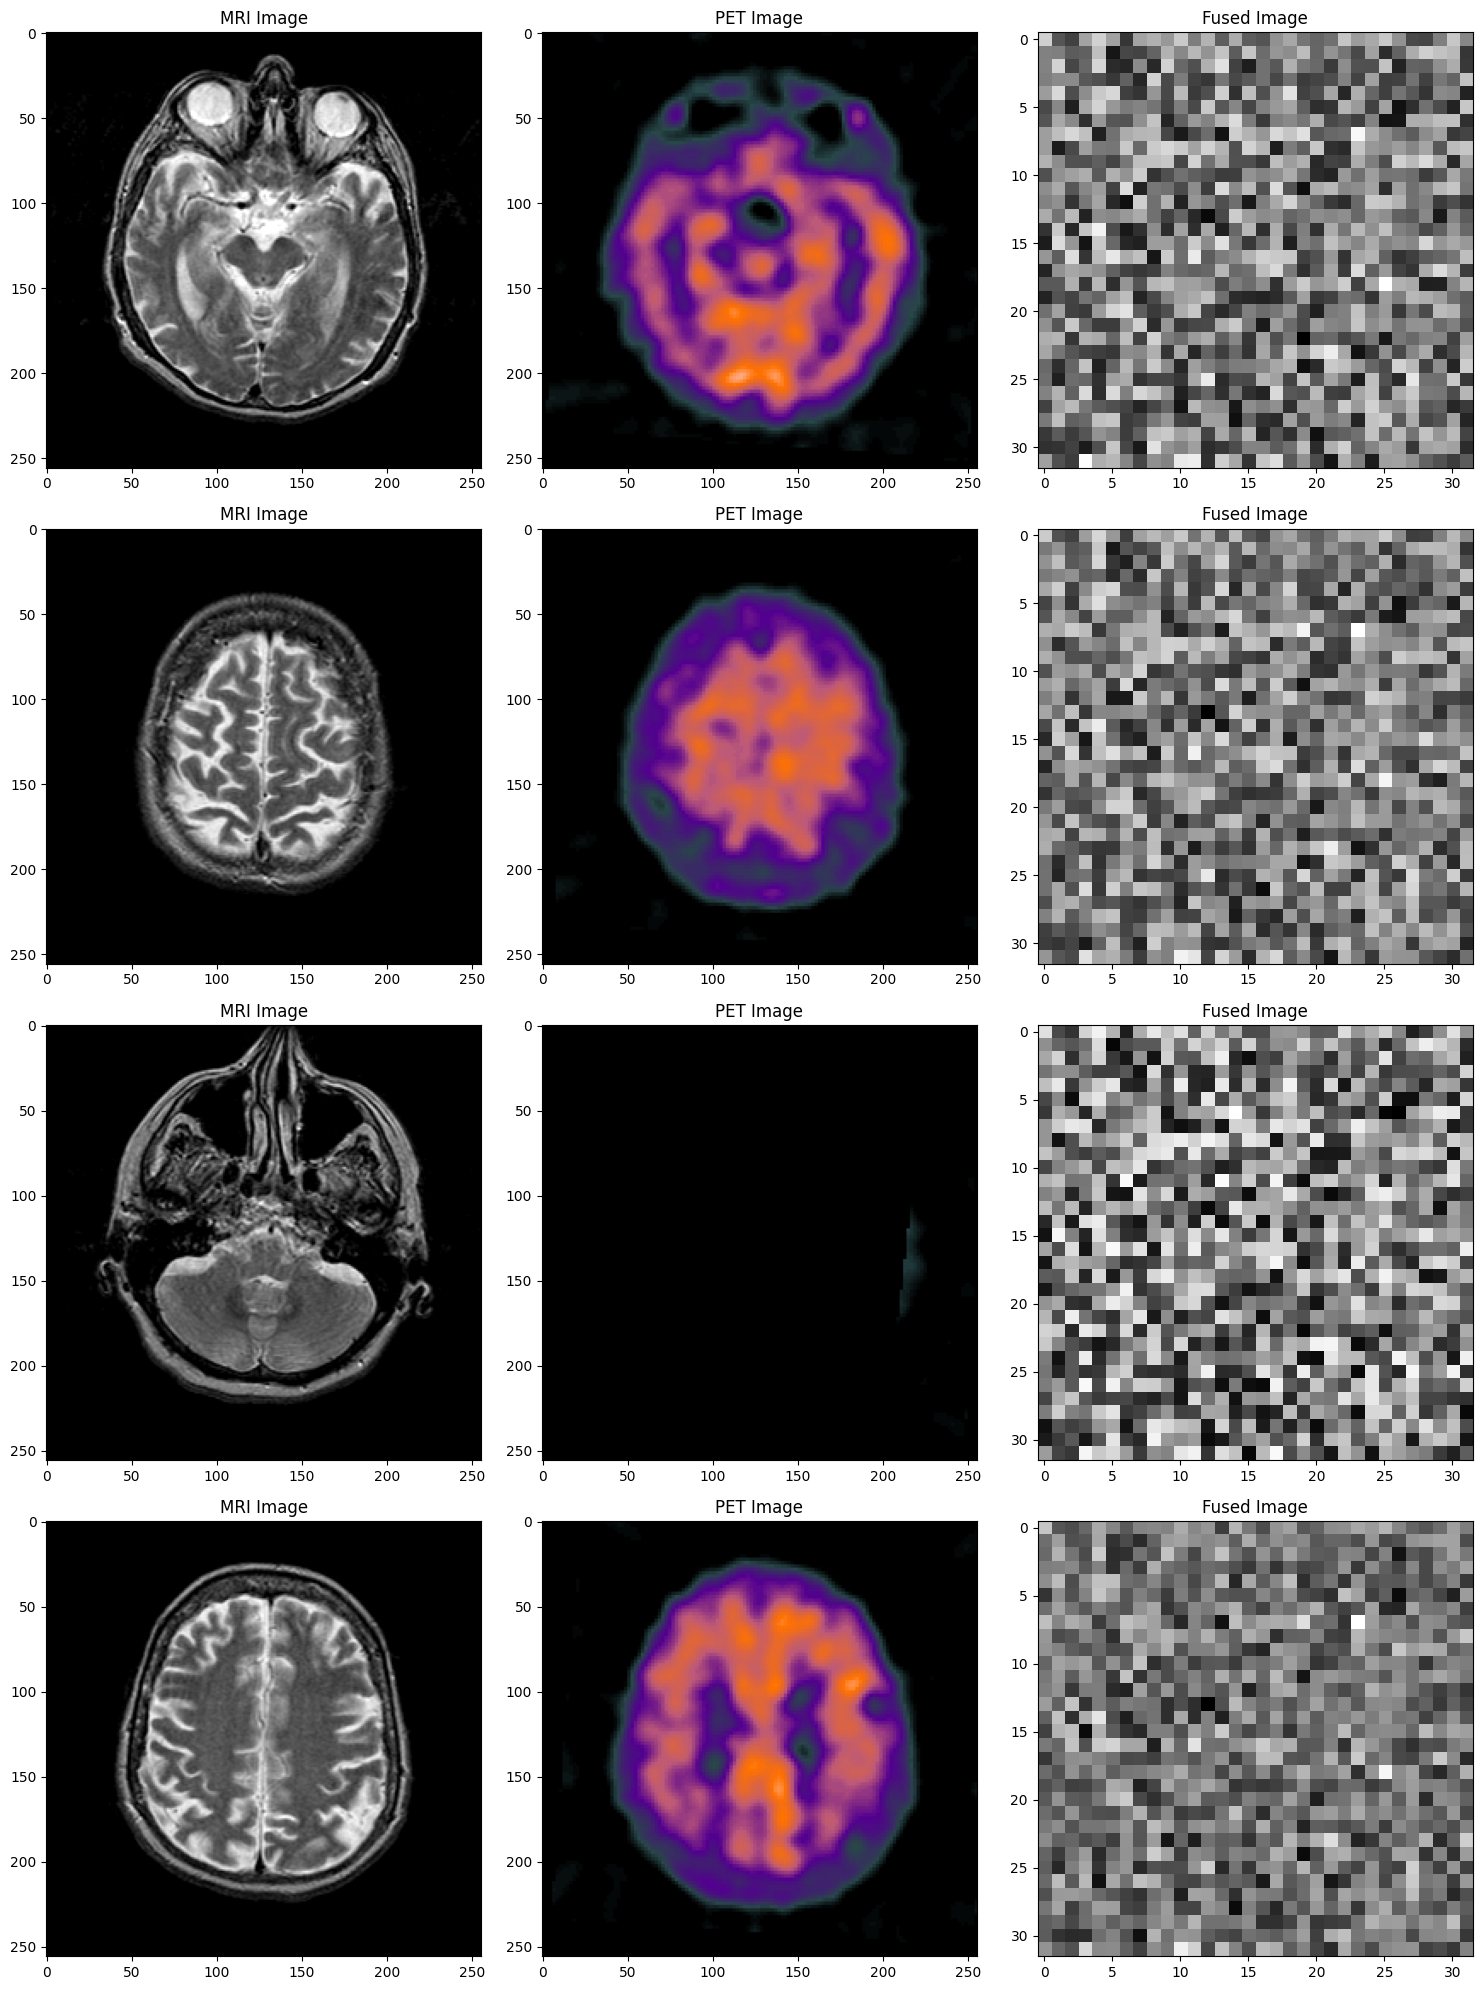

In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

def preprocess_images(mri_img, pet_img):
    # Permute dimensions to [batch_size, channels, height, width]
    mri_img = mri_img.permute(0, 3, 1, 2)
    pet_img = pet_img.permute(0, 3, 1, 2)
    
    if mri_img.shape[1] == 3:
        mri_img = torch.mean(mri_img, dim=1, keepdim=True)  
    
    # Ensure PET is RGB
    if pet_img.shape[1] == 1:
        pet_img = pet_img.repeat(1, 3, 1, 1)  
    
    print(f"Preprocessed MRI shape: {mri_img.shape}, PET shape: {pet_img.shape}")
    return mri_img, pet_img


def display_batch_fused_images(mri_imgs, pet_imgs, fused_imgs):
    batch_size = mri_imgs.size(0)
    plt.figure(figsize=(15, 5 * batch_size))
    
    for i in range(batch_size):
        mri_img_np = mri_imgs[i].squeeze().cpu().numpy()
        pet_img_np = pet_imgs[i].squeeze().cpu().numpy()
        fused_img_np = fused_imgs[i].squeeze().cpu().numpy()
        
        if mri_img_np.shape[0] == 1: 
            mri_img_np = mri_img_np[0]
        if pet_img_np.shape[0] == 3:
            pet_img_np = np.transpose(pet_img_np, (1, 2, 0))  

        plt.subplot(batch_size, 3, i * 3 + 1)
        plt.imshow(mri_img_np, cmap='gray')
        plt.title('MRI Image')
        
        plt.subplot(batch_size, 3, i * 3 + 2)
        plt.imshow(pet_img_np)
        plt.title('PET Image')
        
        plt.subplot(batch_size, 3, i * 3 + 3)
        plt.imshow(fused_img_np, cmap='gray')
        plt.title('Fused Image')
    
    plt.tight_layout()
    plt.show()


def fuse_test_images(model, test_loader):
    model.eval() 
    with torch.no_grad():
        for mri_img, pet_img in test_loader:

            mri_img, pet_img = preprocess_images(mri_img, pet_img)
    
            inputs = torch.cat((mri_img, pet_img), dim=1)  # Shape: [batch_size, 4, height, width]

            fused_images = model(inputs)
            
            display_batch_fused_images(mri_img, pet_img, fused_images)

model = FusionCNN()

fuse_test_images(model, alz_test_loader)

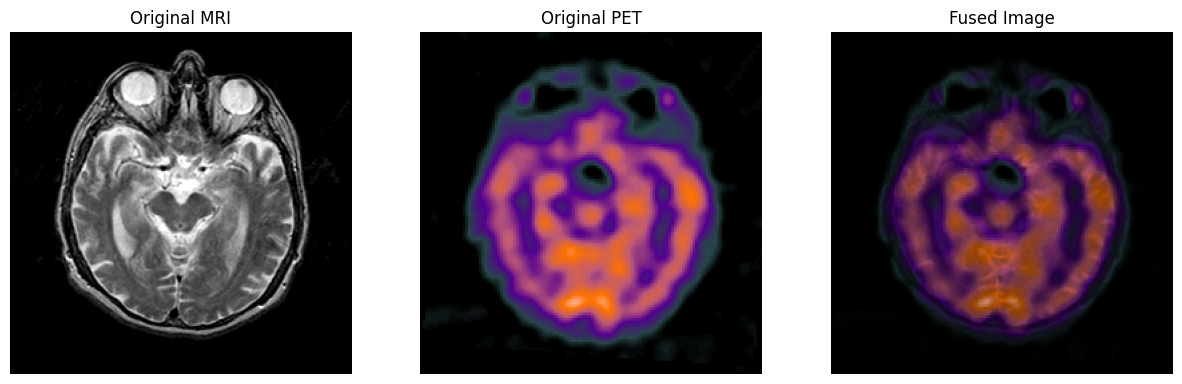

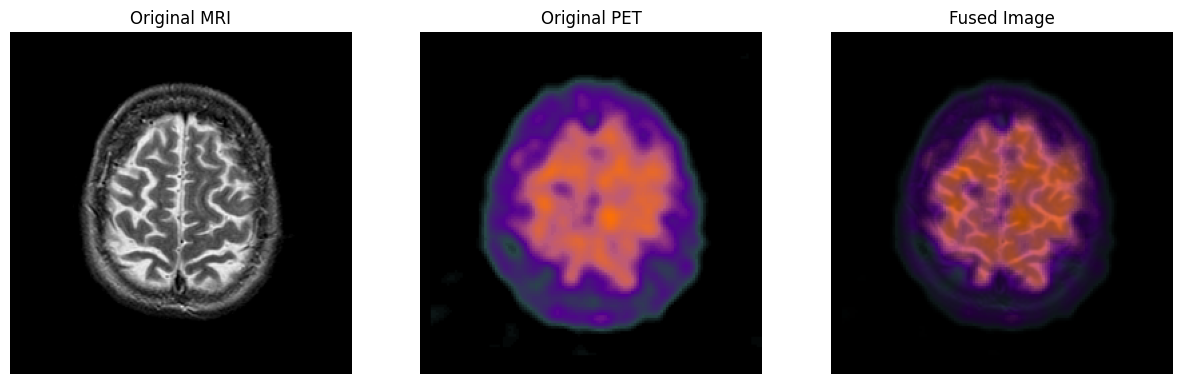

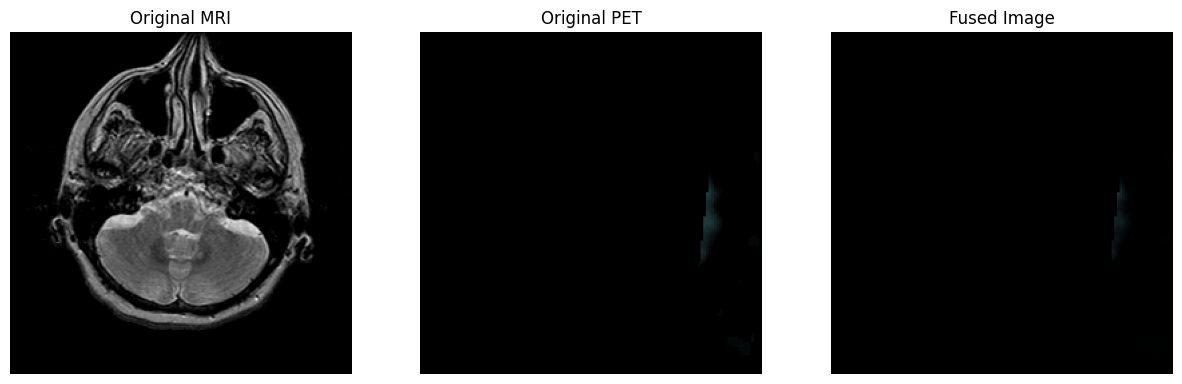

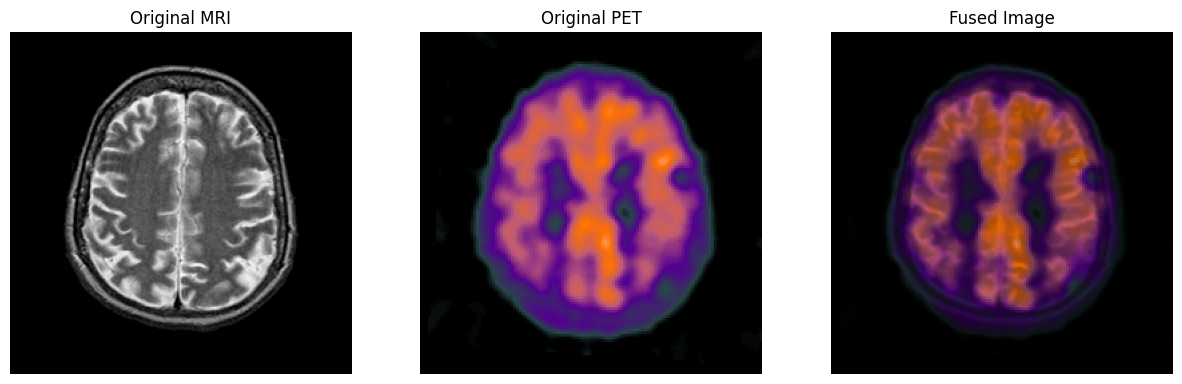

In [11]:
# shit1 fused based on pet color
def normalize_image(img):
    img = (img - img.min()) / (img.max() - img.min())
    return img

def enhance_edges(mri_image):
    if mri_image.ndim == 4 and mri_image.shape[1] != 1:
        mri_image = mri_image.permute(0, 3, 1, 2)  #[B, C, H, W]
    
    # Laplacian kernel for edge enhancement
    laplacian_kernel = torch.tensor([[[[0, 1, 0], [1, -4, 1], [0, 1, 0]]]], dtype=torch.float32).to(mri_image.device)
    mri_edges = F.conv2d(mri_image, laplacian_kernel, padding=1)
    mri_edges = normalize_image(mri_edges)
    return mri_edges.squeeze(0)  # Remove batch dimension

def fuse_image(mri_image, pet_image, mri_weight=0.5, pet_weight=0.5, edge_weight=0.2):
    if mri_image.shape[-1] == 3:
        mri_image = torch.mean(mri_image, dim=-1, keepdim=True)
    mri_image = normalize_image(mri_image).unsqueeze(0)  # [1, 1, H, W]
    
    pet_image_gray = torch.mean(pet_image, dim=-1, keepdim=True)
    pet_image_gray = normalize_image(pet_image_gray).unsqueeze(0)
    mri_edges = enhance_edges(mri_image)
    
    mri_image = mri_image.squeeze()  # Remove unnecessary dimensions [H, W]
    fused_image = mri_weight * mri_image + pet_weight * pet_image_gray.squeeze() + edge_weight * mri_edges
    fused_image = fused_image.cpu().numpy()

    pet_image_rgb = pet_image.permute(2, 0, 1).cpu().numpy()  
    fused_image_rgb = np.zeros_like(pet_image_rgb)
    for c in range(3):
        fused_image_rgb[c, :, :] = fused_image * pet_image_rgb[c, :, :] 

    return fused_image_rgb.transpose(1, 2, 0)

for i in range(len(alz_test_dataset)):
    mri_image, pet_image = alz_test_dataset[i]
    fused_result = fuse_image(mri_image, pet_image)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(mri_image.squeeze(), cmap='gray')
    plt.title("Original MRI")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(pet_image.squeeze())
    plt.title("Original PET")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(fused_result)  
    plt.title("Fused Image")
    plt.axis('off')

    plt.show()

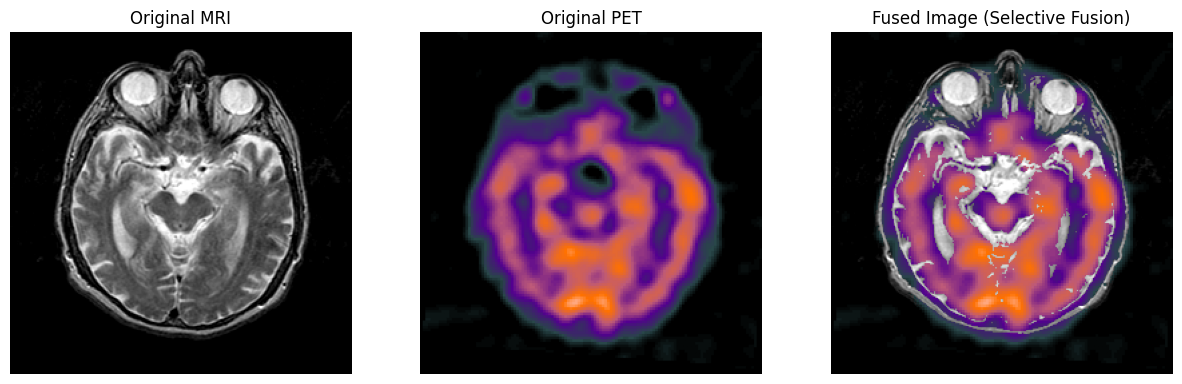

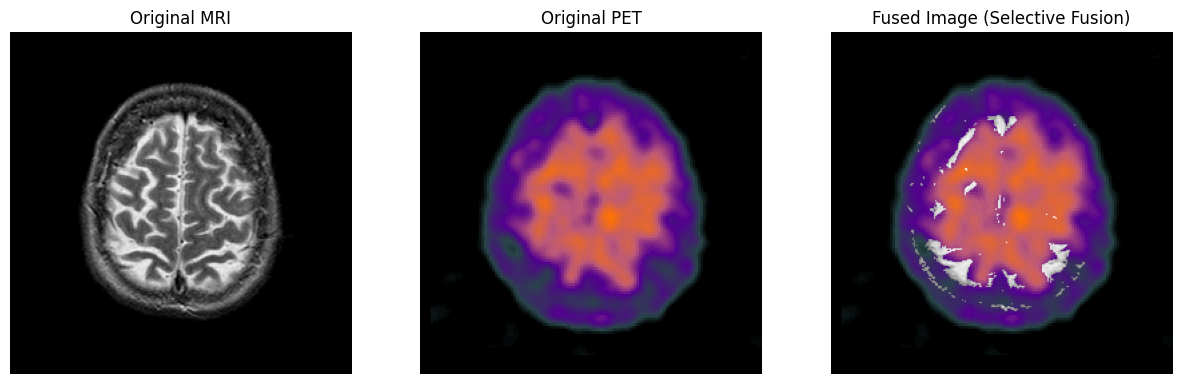

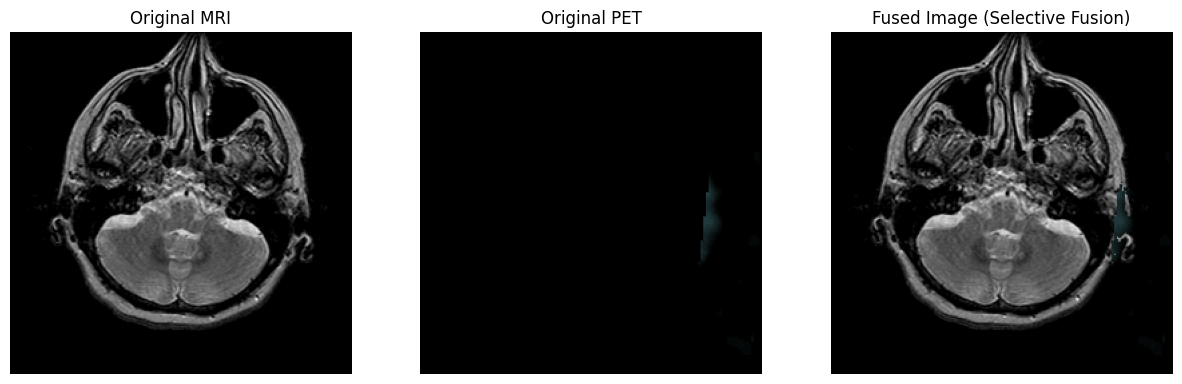

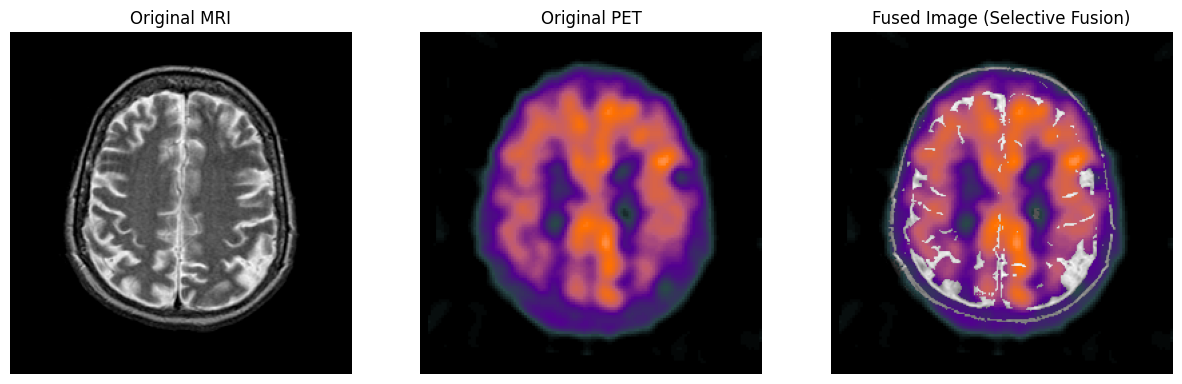

In [12]:
# shit2 
def normalize_image(img):
    img = (img - img.min()) / (img.max() - img.min())
    return img

# fuse MRI and PET images by selecting dominant regions
def fuse_image_selective(mri_image, pet_image):
    if mri_image.shape[-1] == 3:
        mri_image = torch.mean(mri_image, dim=-1, keepdim=True)
    mri_image = normalize_image(mri_image)
    
    pet_image_gray = torch.mean(pet_image, dim=-1, keepdim=True)
    pet_image_gray = normalize_image(pet_image_gray)

    mri_dominant_mask = mri_image > pet_image_gray 
    pet_dominant_mask = ~mri_dominant_mask          
    
    fused_intensity = torch.where(mri_dominant_mask, mri_image, pet_image_gray).squeeze().cpu().numpy()

    pet_image_rgb = pet_image.permute(2, 0, 1).cpu().numpy()  # Original PET color
    fused_image_rgb = np.zeros_like(pet_image_rgb)
    
    for c in range(3):
        pet_channel = pet_image_rgb[c, :, :]
        fused_image_rgb[c, :, :] = np.where(pet_dominant_mask.squeeze().cpu().numpy(), pet_channel, fused_intensity)

    return fused_image_rgb.transpose(1, 2, 0)  # Transpose to H, W, C 

for i in range(len(alz_test_dataset)):
    mri_image, pet_image = alz_test_dataset[i]
    fused_result = fuse_image_selective(mri_image, pet_image)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(mri_image.squeeze(), cmap='gray')
    plt.title("Original MRI")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(pet_image.squeeze())
    plt.title("Original PET")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(fused_result) 
    plt.title("Fused Image (Selective Fusion)")
    plt.axis('off')

    plt.show()

In [49]:
import tensorflow as tf
import numpy as np
# Define image paths
# Hyperparameters
IMG_SIZE = (256, 256)  # Desired image size for resizing
BATCH_SIZE = 32        # Batch size for training

# Preprocessing function
alz_mri_train = np.load('alz_mri_train.npy')
alz_mri_train = np.transpose(alz_mri_train,(3,0,1,2))
alz_mri_test = np.load('alz_mri_test.npy')
alz_mri_test = np.transpose(alz_mri_test,(3,0,1,2))
alz_mri_val = np.load('alz_mri_val.npy')
alz_mri_val = np.transpose(alz_mri_val,(3,0,1,2))

alz_pet_train = np.load('alz_pet_train.npy')
alz_pet_train = np.transpose(alz_pet_train,(3,0,1,2))
alz_pet_test = np.load('alz_pet_test.npy')
alz_pet_test = np.transpose(alz_pet_test,(3,0,1,2))
alz_pet_val = np.load('alz_gt_val.npy')
alz_pet_val = np.transpose(alz_pet_val,(3,0,1,2))

alz_gt_train = np.load('alz_gt_train.npy')
alz_gt_train = np.transpose(alz_gt_train,(3,0,1,2))
alz_gt_test = np.load('alz_gt_test.npy')
alz_gt_test = np.transpose(alz_gt_test,(3,0,1,2))
alz_gt_val = np.load('alz_gt_val.npy')
alz_gt_val = np.transpose(alz_gt_val,(3,0,1,2))

# Create datasets for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices(((alz_mri_test,alz_pet_test),
                                                    alz_gt_test))
train_dataset = train_dataset.shuffle(buffer_size=100).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices(((alz_mri_val,alz_pet_val),
                                                  alz_gt_test))
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)


In [50]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from keras.callbacks import LearningRateScheduler
import keras
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

class ImageFusionCNN(Model):
    def __init__(self):
        super(ImageFusionCNN, self).__init__()
        
        # Define named input layers
        
        self.conv1_img1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')
        self.conv1_img2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')
        
        self.fusion_layer = layers.Conv2D(32, (3, 3), activation='relu', padding='same')
        
        self.reconstruct = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')

    def call(self, inputs):
        img1 = inputs[0]
        img2 = inputs[1]

        x1 = self.conv1_img1(img1)
        x2 = self.conv1_img2(img2)
        
        x = layers.concatenate([x1, x2], axis=-1)
        
        # Fusion step
        x = self.fusion_layer(x)
        
        # Reconstruction of the fused image
        output = self.reconstruct(x)
        return output
    
momentum = 0.0
sgd = SGD(learning_rate=0.1, momentum=momentum, decay=0.0, nesterov=False)

def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.01
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate

lrate_ = LearningRateScheduler(exp_decay)
callbacks_list_ = [lrate_]

fusion_model = ImageFusionCNN()

fusion_model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])




In [51]:
# Train the model with validation
history = fusion_model.fit(
    train_dataset, 
    validation_data=val_dataset, 
    epochs=10
)

print(history)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step - accuracy: 0.5444 - loss: 0.4620 - val_accuracy: 0.5808 - val_loss: 0.4615
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.6201 - loss: 0.4611 - val_accuracy: 0.6038 - val_loss: 0.4610
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6303 - loss: 0.4605 - val_accuracy: 0.6205 - val_loss: 0.4605
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6326 - loss: 0.4598 - val_accuracy: 0.6374 - val_loss: 0.4601
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.6339 - loss: 0.4593 - val_accuracy: 0.6618 - val_loss: 0.4597
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6474 - loss: 0.4588 - val_accuracy: 0.7011 - val_loss: 0.4594
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6768 - loss: 0.4583 - val_accuracy: 0.7361 - val_loss: 0.4592
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6977 - loss: 0.4579 - val_accuracy: 0.4247 - val_loss: 0

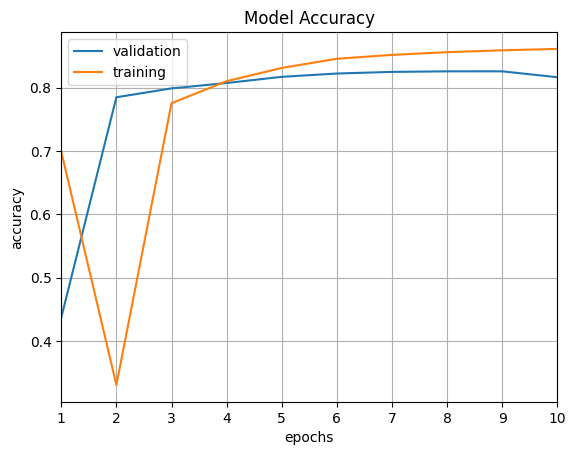

In [41]:
import matplotlib.pyplot as plt
epochs = 10
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='training')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#   plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    plt.close(fig)

plot_fig(0,history)

In [ ]:
fused_prediction = fusion_model.predict({'img1': img1, 'img2': img2})

# Plot the input images, ground truth, and fused prediction
plt.figure(figsize=(15, 5))

# Plot Input Image 1 (MRI)
plt.subplot(1, 4, 1)
plt.imshow(img1[0])  # Remove batch dimension for plotting
plt.title('Input Image 1 (MRI)')
plt.axis('off')

# Plot Input Image 2 (PET)
plt.subplot(1, 4, 2)
plt.imshow(img2[0])  # Remove batch dimension for plotting
plt.title('Input Image 2 (PET)')
plt.axis('off')

# Plot Ground Truth
plt.subplot(1, 4, 3)
plt.imshow(ground_truth[0])  # Remove batch dimension for plotting
plt.title('Ground Truth')
plt.axis('off')

# Plot Fused Prediction
plt.subplot(1, 4, 4)
plt.imshow(fused_prediction[0])  # Remove batch dimension for plotting
plt.title('Fused Prediction')
plt.axis('off')

plt.tight_layout()
plt.show()